<a href="https://colab.research.google.com/github/mayurandhare13/LSDS_Python_Intro/blob/master/MAYUR_ANDHARE_LSDS_Intro_Assignment_1_Getting_Started_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Getting Started with Python

Following are exercises you should complete after watching the first intro lecture. Workflow:

1. Sign in to a Google account
2. Copy the notebook (`File` -> `Save a copy in Drive`)
3. Complete the exercises! This means fill out the code cells, and run them (shift-enter or click the play button that appears when you're in one of them)
4. Take a look at your work, and write comments/add text cells as appropriate to explain
5. Make the notebook URL viewable and submit with the standup form

## Exercise 1 - A bit of Math

For these "word" problems, use Python to clearly solve them. Your code will "show your work" - use good variable names! To show your answers you should write a `print()` statement at the end.

As you work, follow the **20 minute rule** - that means if you're stuck on something for 20 minutes, you should ask a question!

### a) It's a gas

A taxi driver is calculating their profit over two weeks by adding up the fares they charge and subtracting the cost of gas. The price of gas changes over time - it was `$3.52`/gallon the first week and `$3.57`/gallon this second week. Their car gets 20 miles per gallon.

For the first week the driver had a total of 23 passengers with average `$29` fare each, and drove a total of 160 miles. For the second week they had 17 passengers with average `$30` fare each, and drove a total of 220 miles. Assume that for both weeks they purchase all the gas needed during that week (i.e. they refuel every week to maintain a constant level of gas in the tank).

Based on the above, answer the following questions:

- What is their total profit over both weeks?
- During which week was their average (mean) profit per passenger higher?


In [0]:
def gas_cost(week_no, miles):
  total_gallon = miles / 20
  if(week_no == 'one'):
    g_cost = 3.52 * total_gallon
  
  elif(week_no == 'two'):
    g_cost = 3.57 * total_gallon
  
  return g_cost

def total_amount(week_no, no_of_passengers, rent, miles):
  g_cost = gas_cost(week_no, miles)
  if(week_no == 'one'):
    total_rent = no_of_passengers * rent
  
  elif(week_no == 'two'):
    total_rent = no_of_passengers * rent
    
  return total_rent - g_cost

def calc_profit():
  one_week_total = total_amount('one', 23, 29, 160)
  print("first week gross profit", one_week_total)
  
  two_week_total = total_amount('two', 17, 30, 220)
  print("second week gross profit", two_week_total)
  print("AVG profit 1st week per passenger: ", one_week_total / 23)
  print("AVG profit 2nd week per passenger: ", two_week_total / 17)
  
  
calc_profit()

first week gross profit 638.84
second week gross profit 470.73
AVG profit 1st week per passenger:  27.775652173913045
AVG profit 2nd week per passenger:  27.69


### b) Mo' money...

A cash drawer contains 160 bills, all 10s and 50s. The total value of the 10s and 50s is $1,760.

How many of each type of bill are in the drawer? You can figure this out by trial and error (or by doing algebra with pencil and paper), but try to use loops and conditionals to check a plausible possibilities and stop when you find the correct one.

In [0]:
#asked for fiirst correct one
total = 1760
def first_bills(total):
  amount = 0
  for i in range(1, 161):
    for j in range(1, 161):
      amount = 10*i + 50*j
      if amount == total:
        return (i, j) #for all possibilities remove return and append in list

      if (i + j) == 160:
        break

print(first_bills(total))

(1, 35)


## Exercise 2 - Drawing a plot

Use NumPy and Matplotlib to draw a scatterplot of uniform random `(x, y)` values all drawn from the `[0, 1]` interval. Helpful documentation:

*   https://matplotlib.org/tutorials/index.html
*   https://docs.scipy.org/doc/numpy/user/quickstart.html

Stretch goal - draw more plots! You can refer to the [Matplotlib gallery](https://matplotlib.org/gallery.html) for inspiration, but don't just reproduce something - try to apply it to your own data.

How to get data? There's *many* ways, but a good place to get started is with [sklearn.datasets](http://scikit-learn.org/stable/datasets/index.html):

```
from sklearn import datasets
dir(datasets)
```

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
dir(datasets)

Shape:  (4, 150)


Text(0,0.5,'petal length (cm)')

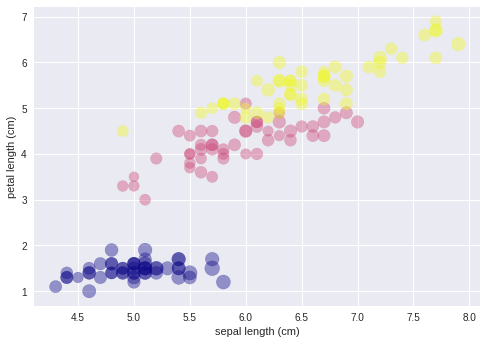

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T #represents features
print("Shape: ", iris.data.T.shape)
plt.scatter(features[0], features[2], alpha=0.4,
           s=50*features[1], c=iris.target, cmap='plasma')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])


## Exercise 3 - Writing a function
Write a function that, given a list of numbers, calculates the mean, median, and mode of those numbers. Return a dictionary with properties for the mean, median and mode. 

For example:

```
mmm_dict = meanMedianMode([1, 2, 6, 7, 8, 9, 3, 4, 5, 10, 10])
print(mmm_dict)
> {'mean': 5.909090909090909, 'median': 6, 'mode': 10}
```

There are Python standard libraries that make calculating these numbers very easy, but first try your hand at implementing it using the `reduce()` function:

In [0]:
from functools import reduce
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [0]:
def meanMedianMode(numbers):
  
  dict = {'mean': 0, 'median':0, 'mode':0}
  
  sorted(numbers)
  print(numbers)
  sum = reduce(lambda x, y: x+y, numbers)
  mean = sum / len(numbers)
  dict['mean'] = mean

  l_num = len(numbers)
  if l_num%2 == 1:
    median = numbers[l_num // 2]
  else:
    median = (numbers[l_num//2-1] + numbers[l_num//2+1])/2.0
  dict['median'] = median

  mode = max(set(numbers), key = numbers.count)
  dict['mode'] = mode
  
  return dict

    
numbers = [1, 2, 6, 7, 8, 9, 3, 13,13, 4, 5, 10]
dict = meanMedianMode(numbers)
print(dict)

[1, 2, 6, 7, 8, 9, 3, 13, 13, 4, 5, 10]
{'mean': 6.75, 'median': 11.0, 'mode': 13}
